In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib as g
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report # for model evaluation metrics 

data = pd.read_csv("speedDating_trab.csv", index_col=0)
data_clean = data.copy()
data_clean=data_clean.dropna() #cut all NaN values
y=data_clean[['match']].copy()
X=data_clean[['age', 'age_o', 'goal', 'date', 'go_out','int_corr', 'length', 'met', 'like','prob']].copy()


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_features=1, max_depth=20, min_samples_leaf=20, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_features=1, min_samples_leaf=20,
                       random_state=42)

In [3]:

##----EVALUATE PERFORMANCE----##
#accuracy
y_predict=model.predict(X_test) #make preditions
print("accuracy:", accuracy_score(y_test, y_predict)*100)

#check the test score
print("test score:", model.score(X_test,y_test)*100)
#check the training score
print("train score:",model.score(X_train, y_train)*100)

 # Predict class labels on training data
print("train predict:",  model.predict(X_train))

    # Predict class labels on a test data
print("test predict:", model.predict(X_test))
print("report:",classification_report(y_test, y_predict))

accuracy: 83.86627906976744
test score: 83.86627906976744
train score: 83.42420937840785
train predict: [0 0 0 ... 0 0 1]
test predict: [0 0 0 ... 0 0 0]
report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1146
           1       0.59      0.12      0.20       230

    accuracy                           0.84      1376
   macro avg       0.72      0.55      0.55      1376
weighted avg       0.80      0.84      0.79      1376



confusion matrix:
[[1127   19]
 [ 203   27]]


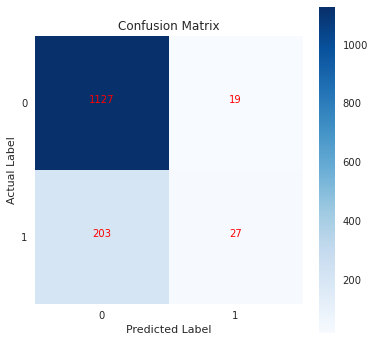

In [4]:
from sklearn.metrics import confusion_matrix
import itertools
print("confusion matrix:")
conf_mat = confusion_matrix(y_test, y_predict)
print(conf_mat)

with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')  #[[TN, FP ] [FN, TP ]]
    plt.colorbar();

In [ ]:
tree.plot_tree(model)
plt.show()


In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
model.predict(X_test)

In [ ]:
#probabilidade de match zero e match 1
model.predict_proba(X_test)

In [5]:
 #export the tree
from IPython.display import Image  
feature_cols=['age', 'age_o', 'goal', 'date', 'go_out','int_corr', 'length', 'met', 'like', 'prob']

decision_tree=tree.export_graphviz(model,out_file='treeCART_dot',filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'], max_depth=3)
#description of the tree
print('Classes: ', model.classes_)
print('Tree Depth: ', model.tree_.max_depth)
print('No. of leaves: ', model.tree_.n_leaves)
print('No. of features: ', model.n_features_)

Classes:  [0 1]
Tree Depth:  14
No. of leaves:  157
No. of features:  10


In [6]:
#save the tree in .png 
!dot -Tpng treeCART_dot -o treeCART.png

In [ ]:
#test the min samples in leafs
train_accuracy=[]
validation_accuracy=[]
for size in range (1,100):
    model=DecisionTreeClassifier(min_samples_leaf=size, random_state=10)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train,y_train))
    validation_accuracy.append(model.score(X_test,y_test))
frame=pd.DataFrame({'T_size': range(1,100), 'train': train_accuracy, 'test':validation_accuracy})
#plot
plt.figure(figsize=(12,6))
plt.plot(frame['T_size'], frame['train'], frame['test'])
plt.xlabel('min_samples_leafs')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

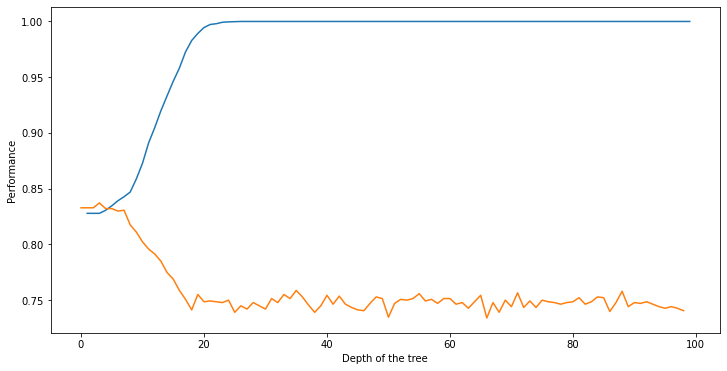

In [7]:
#test depth of the tree
train_accuracy=[]
validation_accuracy=[]
for depth in range (1,100):
    model=DecisionTreeClassifier(max_depth=depth, random_state=None)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train,y_train))
    validation_accuracy.append(model.score(X_test,y_test))
frame=pd.DataFrame({'max_depth': range(1,100), 'train': train_accuracy, 'test':validation_accuracy})
#plot
plt.figure(figsize=(12,6))
#azul train class, yeallow test class
plt.plot(frame['max_depth'], frame['train'], frame['test'])
plt.xlabel('Depth of the tree')
plt.ylabel('Performance')

In [ ]:
#how to try to predict a match or not using array of data
Xnew=[[22,33,2,7,1,0.61,2,1,6,9]]

print(model.predict(Xnew))